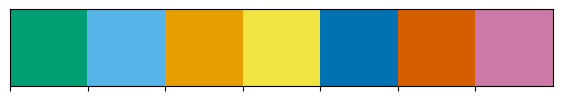

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##
## color from https://www.nature.com/articles/nmeth.1618
##
palette = sns.color_palette(
    palette=[
        "#009E73",
        "#56B4E9",
        "#E69F00",
        "#F0E442",
        "#0072B2",
        "#D55E00",
        "#CC79A7",
    ]
)

sns.set_palette(palette)
sns.palplot(pal=palette)

# paper hardware type

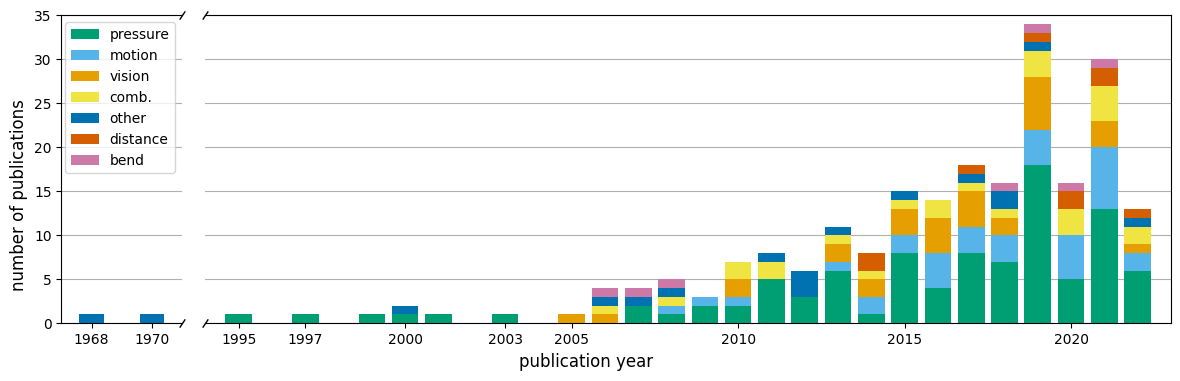

In [2]:
df = pd.read_csv("SP_paper_year_hw-type.csv", sep=",")
df = df[
    [
        "Year",
        "motion",
        "distance",
        "bend",
        "vision",
        "pressure",
        "other",
        "combinations",
    ]
]
years = df.Year.sort_values().unique()
df = df.groupby(["Year"]).count().unstack()
year_sum = df.groupby(["Year"]).sum()
year_max = max(year_sum)

fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 4), sharey=True, gridspec_kw={"width_ratios": [1, 8]}
)

# Left plot
x_ticks_1 = [1968, 1970]
x_labels_1 = [1968, 1970]

axs[0].set_ylim(0, year_max + 1)
axs[0].set_xlim(1967, 1971)
axs[0].grid(axis="y")
axs[0].set_axisbelow(True)
axs[0].set_xticks(x_ticks_1)
axs[0].set_xticklabels(x_labels_1)
axs[0].spines.right.set_visible(False)
axs[0].yaxis.tick_left()

axs[0].bar(years, df["pressure"], label="pressure")
axs[0].bar(years, df["motion"], bottom=df["pressure"], label="motion")
axs[0].bar(years, df["vision"], bottom=df["pressure"] + df["motion"], label="vision")
axs[0].bar(
    years,
    df["combinations"],
    bottom=df["pressure"] + df["motion"] + df["vision"],
    label="comb.",
)
axs[0].bar(
    years,
    df["other"],
    bottom=df["pressure"] + df["motion"] + df["vision"] + df["combinations"],
    label="other",
)
axs[0].bar(
    years,
    df["distance"],
    bottom=df["pressure"]
    + df["motion"]
    + df["vision"]
    + df["combinations"]
    + df["other"],
    label="distance",
)
axs[0].bar(
    years,
    df["bend"],
    bottom=df["pressure"]
    + df["motion"]
    + df["vision"]
    + df["combinations"]
    + df["other"]
    + df["distance"],
    label="bend",
)

#Right plot
x_ticks_2 = [1995, 1997, 2000, 2003, 2005, 2010, 2015, 2020]
x_labels_2 = [1995, 1997, 2000, 2003, 2005, 2010, 2015, 2020]

axs[1].yaxis.tick_left()
axs[1].tick_params(labelleft=False)
axs[1].yaxis.set_ticks_position("none")
axs[1].set_xlim(1994, 2023)
axs[1].grid(axis="y")
axs[1].set_axisbelow(True)
axs[1].set_xticks(x_ticks_2)
axs[1].set_xticklabels(x_labels_2)
axs[1].spines.left.set_visible(False)
axs[1].yaxis.tick_left()
axs[1].tick_params(labelleft=False)
axs[1].yaxis.set_ticks_position("none")

axs[1].bar(years, df["pressure"], label="pressure")
axs[1].bar(years, df["motion"], bottom=df["pressure"], label="motion")
axs[1].bar(years, df["vision"], bottom=df["pressure"] + df["motion"], label="vision")
axs[1].bar(
    years,
    df["combinations"],
    bottom=df["pressure"] + df["motion"] + df["vision"],
    label="comb.",
)
axs[1].bar(
    years,
    df["other"],
    bottom=df["pressure"] + df["motion"] + df["vision"] + df["combinations"],
    label="other",
)
axs[1].bar(
    years,
    df["distance"],
    bottom=df["pressure"]
    + df["motion"]
    + df["vision"]
    + df["combinations"]
    + df["other"],
    label="distance",
)
axs[1].bar(
    years,
    df["bend"],
    bottom=df["pressure"]
    + df["motion"]
    + df["vision"]
    + df["combinations"]
    + df["other"]
    + df["distance"],
    label="bend",
)

axs[0].legend()
fig.supylabel("number of publications", x=0.02)
fig.supxlabel("publication year", y=0.06)

d = 1.5
kwargs = dict(
    marker=[(-1, -d), (1, d)],
    markersize=6,
    linestyle="none",
    color="k",
    mec="k",
    mew=1,
    clip_on=False,
)
axs[0].plot([1, 1], [1, 0], transform=axs[0].transAxes, **kwargs)
axs[1].plot([0, 0], [0, 1], transform=axs[1].transAxes, **kwargs)

plt.tight_layout()
plt.savefig("SP_paper_year_hw-type.pdf")
plt.savefig("SP_paper_year_hw-type.png", facecolor="white")
plt.show()